In [79]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
pwd

'C:\\Users\\bibek'

In [81]:
data = pd.read_excel("C:/Users/bibek/Desktop/movie_metadata.xls", 'movie_metadata', index_col=None, na_values=['NA'])



In [82]:
data.head()

,gross,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes
0,760505847.0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,309404152.0,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,200074175.0,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,448130642.0,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [83]:
list(data)

['gross',
 'color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_2_name',
 'actor_1_facebook_likes',
 'genres',
 'actor_1_name',
 'movie_title',
 'num_voted_users',
 'cast_total_facebook_likes',
 'actor_3_name',
 'facenumber_in_poster',
 'plot_keywords',
 'movie_movie_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'movie_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [84]:
data.drop(['movie_movie_link','num_user_for_reviews',"num_critic_for_reviews"], axis=1, inplace=True)
data.dropna(axis=0, inplace=True)
data.drop_duplicates(keep="first", inplace=True)

In [85]:
Xs =data[["color","director_name","duration","director_facebook_likes","actor_3_facebook_likes","actor_2_name","actor_1_facebook_likes","genres","actor_1_name","movie_title","num_voted_users","cast_total_facebook_likes","actor_3_name","facenumber_in_poster","plot_keywords","language","country","content_rating","budget","title_year","actor_2_facebook_likes","movie_score","aspect_ratio","movie_facebook_likes"]]
Y = data[['gross']].to_numpy()

In [86]:
Xs = Xs.select_dtypes(include=[object]).astype(str)
la = preprocessing.OneHotEncoder()
la.fit(Xs)
X = la.transform(Xs).toarray()
X.shape

(3723, 16011)

Training time: 105.305903673172


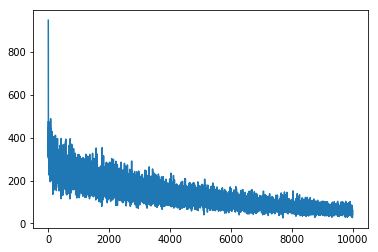

In [137]:
import time as t
def BGDRegression(predictor,response,batch,epochs,eta):
    Xval = (predictor-predictor.min())/(predictor.max()-predictor.min())
    Yval = (response-response.min())/(response.max()-response.min())
    Phi = np.hstack((np.ones((Xval.shape[0],1)),Xval))
    w = np.random.randn(Phi.shape[1],Yval.shape[1])
    Losses = np.empty(epochs)
    for i in range(epochs):
        sample = np.random.choice(np.arange(Phi.shape[0],step=1),size=batch,replace=False)
        phi = Phi[sample]
        y = Yval[sample]
        Loss = (phi@w-y).T@(phi@w-y)
        #print("iteration: {} current loss:{}".format(i+1,Loss))
        Losses[i]=Loss.trace()
        w-=eta*phi.T@(phi@w-y)
    plt.plot(Losses) 
    return

start = t.time()
BGDRegression(X,Y,40,10000,1e-3)
print('Training time: {}'.format(t.time()-start))

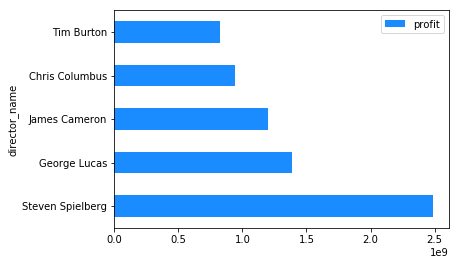

In [88]:
data['profit'] = data['gross'] - data['budget']
data_1 = data.groupby('director_name').profit.sum().nlargest(5)
data_1.plot.barh(color="#1a8cff", legend=True)
plt.show()

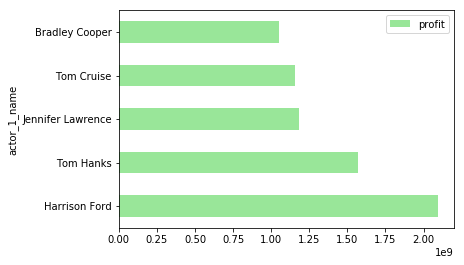

In [127]:
data_2 = data.groupby('actor_1_name').profit.sum().nlargest(5)
data_2.plot.barh(color="#99e699", legend=True)
plt.show()

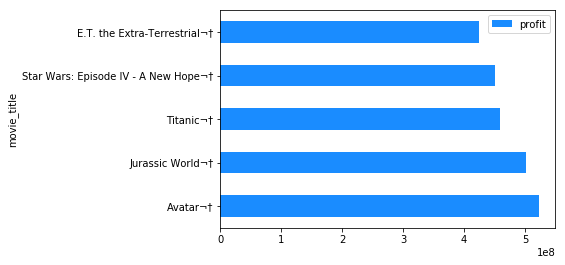

In [90]:
data_3 = data.groupby('movie_title').profit.sum().nlargest(5)
data_3.plot.barh(color="#1a8cff", legend=True)
plt.show()

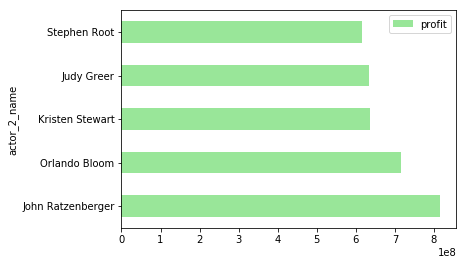

In [128]:
data_4 = data.groupby('actor_2_name').profit.sum().nlargest(5)
data_4.plot.barh(color="#99e699", legend=True)
plt.show()

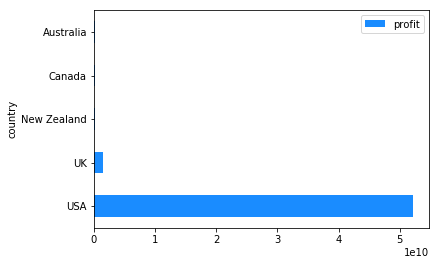

In [134]:
data1 = data.groupby('country').profit.sum().nlargest(5)
data1.plot.barh(color="#1a8cff", legend=True)
plt.show()

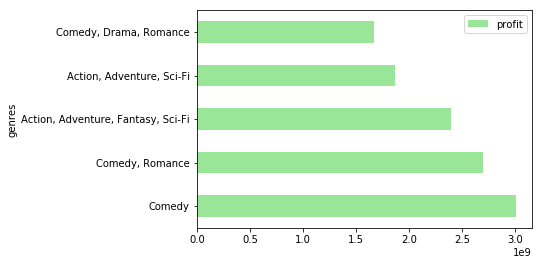

In [129]:
data1 = data.groupby('genres').profit.sum().nlargest(5)
data1.plot.barh(color="#99e699", legend=True)
plt.show()

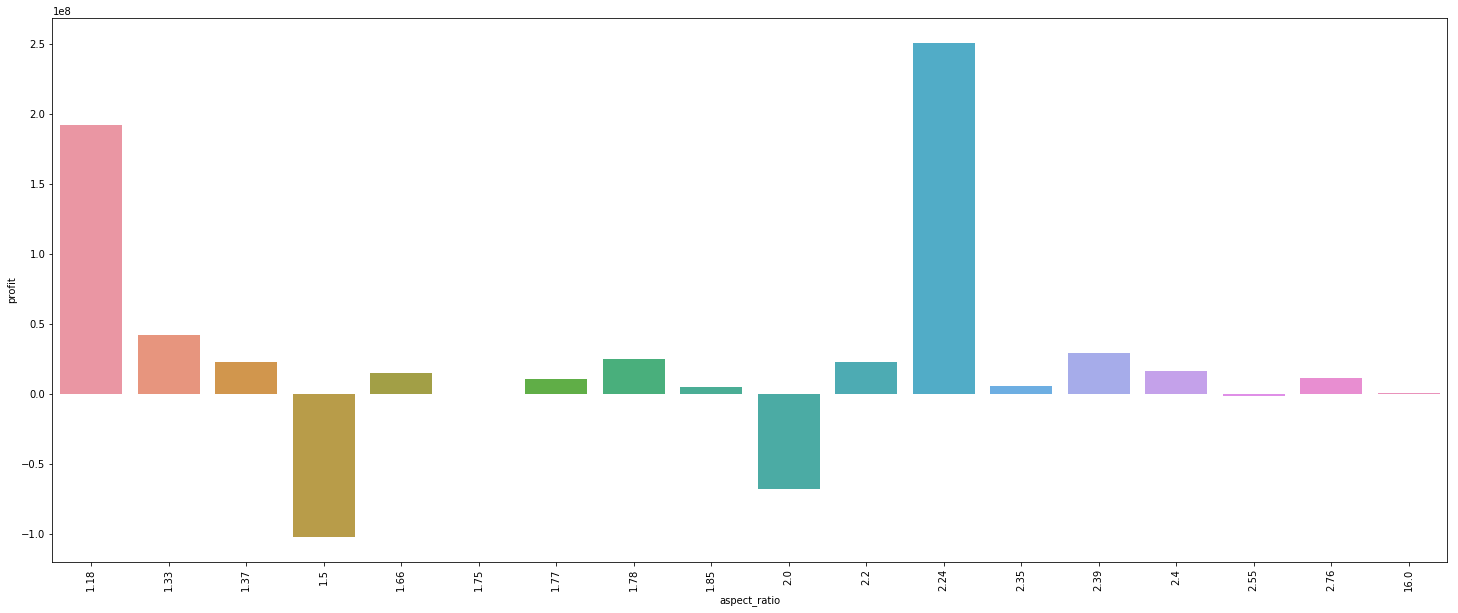

In [93]:
plt.figure(figsize=(25,10))
sns.barplot(data['aspect_ratio'],data['profit'], ci=None)
plt.xticks(rotation=90);

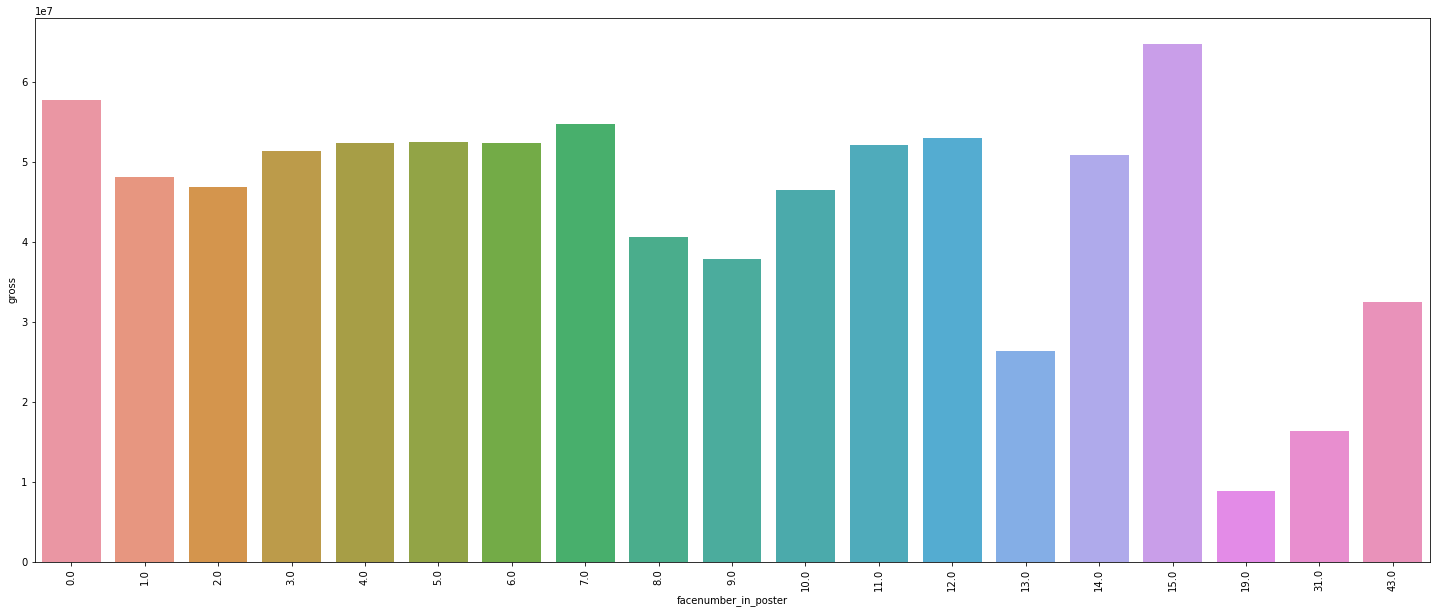

In [94]:
plt.figure(figsize=(25,10))
sns.barplot(data['facenumber_in_poster'],data['gross'], ci=None)
plt.xticks(rotation=90);

In [95]:
data["genres"] = data["genres"].str.replace('|', ', ')
data.head()

,gross,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,movie_score,aspect_ratio,movie_facebook_likes,profit
0,760505847.0,Color,James Cameron,178.0,0.0,855.0,Joel David Moore,1000.0,"Action, Adventure, Fantasy, Sci-Fi",CCH Pounder,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,309404152.0,Color,Gore Verbinski,169.0,563.0,1000.0,Orlando Bloom,40000.0,"Action, Adventure, Fantasy",Johnny Depp,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,200074175.0,Color,Sam Mendes,148.0,0.0,161.0,Rory Kinnear,11000.0,"Action, Adventure, Thriller",Christoph Waltz,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,448130642.0,Color,Christopher Nolan,164.0,22000.0,23000.0,Christian Bale,27000.0,"Action, Thriller",Tom Hardy,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,73058679.0,Color,Andrew Stanton,132.0,475.0,530.0,Samantha Morton,640.0,"Action, Adventure, Sci-Fi",Daryl Sabara,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


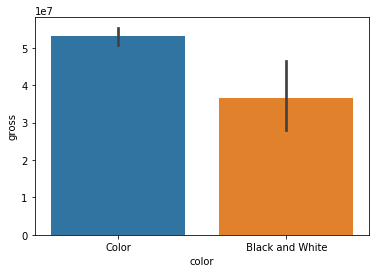

In [126]:
sns.barplot(x='color', y='gross', data=data);

In [113]:
def counts_vectorized(df, col, min=1, vocabulary=None):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(tokenizer=lambda x: x.split(
        ","), min_df=min, vocabulary=vocabulary)
    data = [x.strip("[]") for x in df[col]]
    vectorizer.fit(data)
    counts = pd.DataFrame(vectorizer.transform(data).toarray())
    counts.columns = [x.replace("'", "")
        for x in vectorizer.get_feature_names()]
    return counts.columns

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
BoW = CountVectorizer()
features = BoW.fit_transform(np.hstack(Xs))

In [170]:
BoW.get_feature_names()

['actor_1_facebook_likes',
 'actor_1_name',
 'actor_2_facebook_likes',
 'actor_2_name',
 'actor_3_facebook_likes',
 'actor_3_name',
 'aspect_ratio',
 'budget',
 'cast_total_facebook_likes',
 'color',
 'content_rating',
 'country',
 'director_facebook_likes',
 'director_name',
 'duration',
 'facenumber_in_poster',
 'genres',
 'gross',
 'language',
 'movie_facebook_likes',
 'movie_score',
 'movie_title',
 'num_voted_users',
 'plot_keywords',
 'profit',
 'title_year']

In [157]:
Ngrams = CountVectorizer(ngram_range=(1,3))
NgramFeatures = Ngrams.fit_transform(pd.DataFrame(Xs))
Ngrams.get_feature_names()

['actor_1_name',
 'actor_2_name',
 'actor_3_name',
 'color',
 'content_rating',
 'country',
 'director_name',
 'genres',
 'language',
 'movie_title',
 'plot_keywords']

In [158]:
len(Ngrams.get_feature_names())

11